## Practica 5
## Minimizacion de funciones usando pasos descendentes
El paso descendente es un algoritmo que tiene como objetivo encontrar el minimo de una funcion $f(x)$ dada para un valor o valores de x. La direccion del paso es opuesta a la direccion del gradiente $\nabla f(x)$, porque el gradiente apunta en la direccion de maximo incremento. 

La ecuacion que determina este algoritmo para actualizar el valor de x es la siguiente:

$x_{k+1} = x_k - \alpha_k g_k$ 

Donde:

$\alpha_x$ : Razon de aprendizaje (longitud del paso)

$g_k = \nabla f(x)|_{x=x_k}$

Para el desarrollo de la practica se debe minimizar la funcion: 

$F(\vec{x}^{\,}) = x_1^2 + 25x_2^2$, con gradiente:

$\nabla F(\vec{x}^{\,}) = \begin{bmatrix} 2 x_1 \\ 50 x_2 \end{bmatrix}$, y los valores iniciales:

$\vec{x_0}^{\,} = \begin{bmatrix} 0.5 \\ 0.5 \\ \end{bmatrix} $

La razon de aprendizaje puede ser:
1. Constante
2. Variable

Si es variable, la razon de aprendizaje cambia en cada iteracion de acuerdo a la siguiente ecuacion:

$\alpha = -\frac{g_k^T p_k}{p_k^T A_k p_k }$

In [219]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

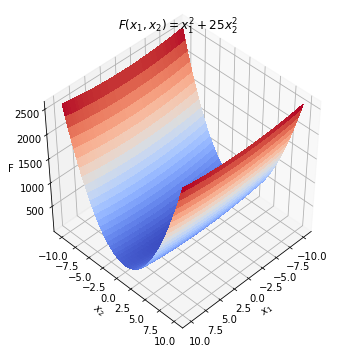

In [220]:
# Se muestra una grafica de la superficie formada por la funcion F(X1, X2)
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.view_init(45, 45)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel('F')
ax.set_title(r'$F(x_1, x_2)=x_1^2+25x_2^2$')

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
F = np.square(X1) + 25*np.square(X2)

surf = ax.plot_surface(X1, X2, F, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

In [221]:
# Gradiente de la funcion
GF = [lambda x: 2*x, lambda x: 50*x]
# Taza de aprendizaje
a = 0.02
# Valores iniciales
x = np.array([0.5, 0.5])
# Gradiente valuado en x
g = np.array([GF[0](x[0]), GF[1](x[1])])
# Limites del error
delta = 0.001

In [222]:
def pasoDescendente(a, x, GF, delta, limitIter, **kwargs):
                    
    numIt = 0         # numero de iteraciones
    history = []      # historial de iteraciones
    update_a = False  # indica si alpha es variable
        
    if kwargs:
        for key in kwargs:
            if kwargs[key] == 'variable':
                A = np.array([[2, 0],[0, 50]])
                update_a = True
    
    for i in range(limitIter):
        
        x_old = x                                  
        g = np.array([GF[0](x[0]), GF[1](x[1])])
        
        if update_a:
            a = np.dot(g, -g)/(np.dot(np.matmul(A, -g), g))  
        
        x = x - a*g

        if x_old[0] < x[0] + delta and x_old[1] < x[1] + delta:
            break
            
        if x_old[0] < x[0] - delta and x_old[1] < x[1] - delta:
            break
        
        numIt += 1
        history.append(['Iteracion ' + str(i+1), x])
        
    return [x, numIt, history]

### Ejercicio 1: razon de aprendizaje constante

In [223]:
x_1, numIt, xs = pasoDescendente(0.02, x, GF, delta, 100000)

In [224]:
print('Vector x final: ')
print(x_1)
print('\nNumero de iteraciones: ', numIt)
print('\nPrimeras 4 iteraciones:')
xs[0:4]

Vector x final: 
[0.02340521 0.        ]

Numero de iteraciones:  74

Primeras 4 iteraciones:


[['Iteracion 1', array([0.48, 0.  ])],
 ['Iteracion 2', array([0.4608, 0.    ])],
 ['Iteracion 3', array([0.442368, 0.      ])],
 ['Iteracion 4', array([0.42467328, 0.        ])]]

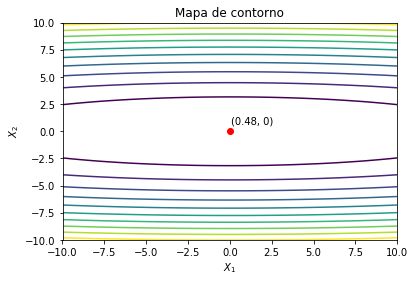

In [225]:
# Se muestra el mapa de contorno de la superficie formada por F(X1, X2) 
# junto con el punto encontrado por el metodo de pasos descendentes
plt.figure()
plt.title('Mapa de contorno')
plt.contour(x1, x2, F, 10)
plt.plot(x_1[0], x_1[1], 'r', marker='o')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.text(0.075, 0.7, '(0.48, 0)')
plt.show()

In [226]:
# Practica 5:
# 1. terminar el ejercicio
# 2. hacer para a variable
# delta = 0.001
# maximo 10^4 iteraciones

### Ejercicio 2: Razon de aprendizaje variable

In [227]:
x_2, numIt2, xs2 = pasoDescendente(0.02, x, GF, 0.001, 100000, alpha='variable')

In [228]:
print('Vector x final: ')
print(x_2)
print('\nNumero de iteraciones: ', numIt2)
print('\nPrimeras 4 iteraciones:')
xs2[0:4]

Vector x final: 
[ 6.02970537e-04 -9.64752859e-07]

Numero de iteraciones:  4

Primeras 4 iteraciones:


[['Iteracion 1', array([ 0.47996928, -0.00076795])],
 ['Iteracion 2', array([0.01772194, 0.01772194])],
 ['Iteracion 3', array([ 1.70119762e-02, -2.72191620e-05])],
 ['Iteracion 4', array([0.00062813, 0.00062813])]]

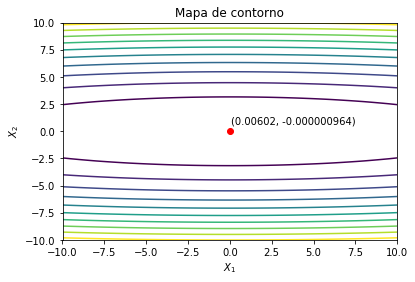

In [229]:
# Se muestra el mapa de contorno de la superficie formada por F(X1, X2) 
# junto con el punto encontrado por el metodo de pasos descendentes, variando
# en cada iteracion el valor de la razon de aprendizaje para dar paso mas peque;os
plt.figure()
plt.title('Mapa de contorno')
plt.contour(x1, x2, F, 10)
plt.plot(x_2[0], x_2[1], 'r', marker='o')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.text(0.075, 0.7, '(0.00602, -0.000000964)')
plt.show()